<a href="https://colab.research.google.com/github/sprapaka/KidneyClassification/blob/main/Suhan/Mask_Generation_Using_ImageThreshold.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [70]:
# using python openCV

import cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
import numpy as np


In [77]:
# set intensity threshold
thresh = 200

# load image and mask
# img = cv2.imread('/content/0001.tiff')
# original_mask = cv2.imread('/content/0001.bmp')
# img = cv2.imread('/content/0002.tiff')
# original_mask = cv2.imread('/content/0002.bmp')
# img = cv2.imread('/content/0003.tiff')
# original_mask = cv2.imread('/content/0003.bmp')
# img = cv2.imread('/content/0004.tiff')
# original_mask = cv2.imread('/content/0004.bmp')
# img = cv2.imread('/content/0005.tiff')
# original_mask = cv2.imread('/content/0005.bmp')
img = cv2.imread('/content/0006.tiff')
original_mask = cv2.imread('/content/0006.bmp')
# convert images to grayscale images
cimg = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)


200.0


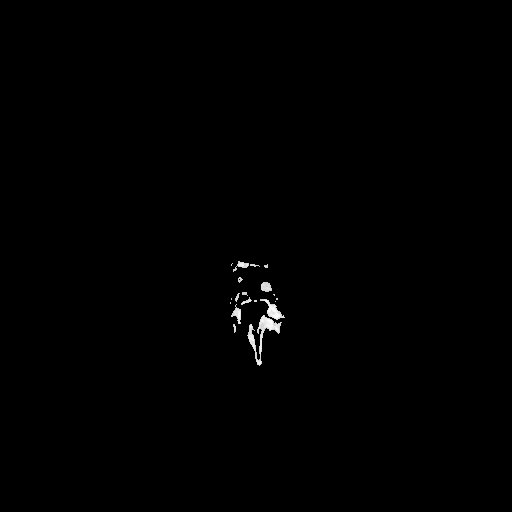

In [78]:
#Threshold to zero - Can be used???
# Arguments of function cv2.threshold
# cv2.threshold(grayscaled image, threshold value, maximum value of pixel, type of threshold)
# Output is a tuple containg the threshold value and thresholded image
rect,thresh_tozero = cv2.threshold(cimg,thresh,255,cv2.THRESH_TOZERO)
print(rect)
cv2_imshow(thresh_tozero)


# Still lot of noise and extra parts in the mask;

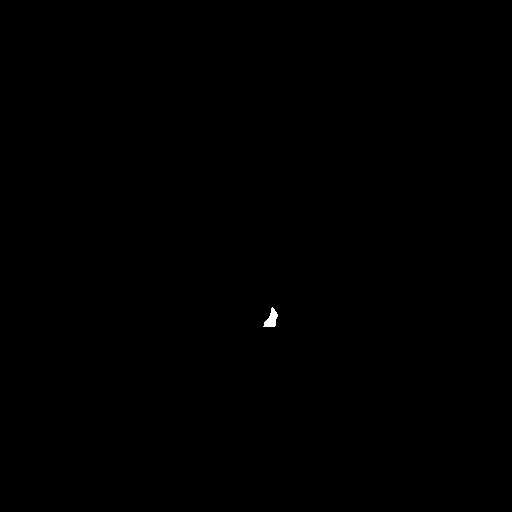

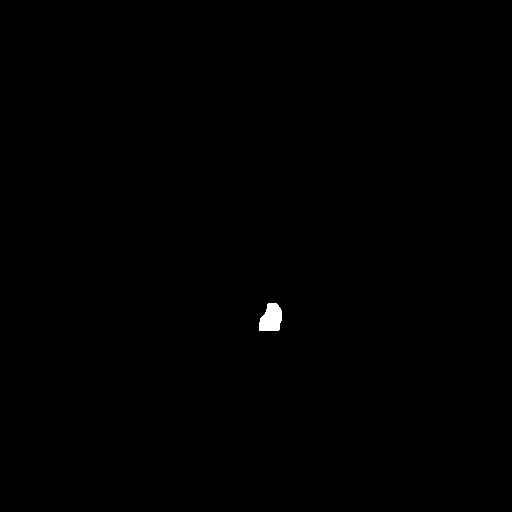

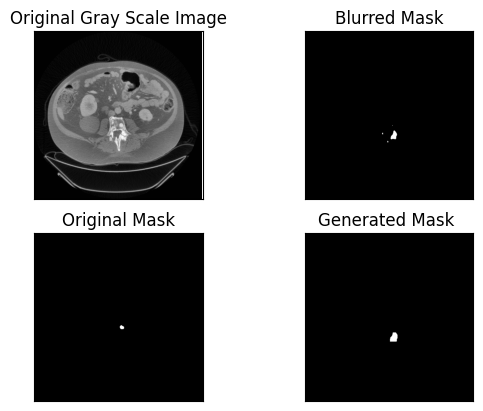

In [79]:

#blur the image so only the brighter spot are retained
blurred = cv2.GaussianBlur(cimg, (11,27),cv2.BORDER_DEFAULT)
#If the pixel value is less than or equal to the assigned threshold, then the pixel value is set to zero or to the maximum value.
mask = cv2.threshold(blurred, thresh, 255, cv2.THRESH_BINARY)[1]

# https://docs.opencv.org/3.4/db/df6/tutorial_erosion_dilatation.html
# perform a series of erosions and dilations to remove

#erode : bright areas of the image get thinner, whereas the dark zones gets bigger.
mask1 = cv2.erode(mask, None, iterations=2)

#dilate: The bright area of the letter dilates around the black regions of the background.
generated_mask = cv2.dilate(mask1, None, iterations=4)

# save result
cv2.imwrite('Mask.jpg', generated_mask)

# show threh and result
cv2_imshow(mask1)
#t, gmask = cv2.threshold(result,180,255,cv2.THRESH_BINARY)
cv2_imshow(generated_mask )

#DISPLAYING THE DIFFERENT THRESHOLDING STYLES
names = ['Original Gray Scale Image', 'Blurred Mask', 'Original Mask', 'Generated Mask ']
images = cimg, mask, original_mask, generated_mask
for i in range(len(names)):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(names[i])

    plt.xticks([]),plt.yticks([])
plt.grid()
plt.show()